### Multiple Linear Regression
   y ~ x1,x2,x3,...,xn
   y_pred = B0 + B1.x1 + B2.x2 + B3.xx3 + ... +Bn.xn

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

### Step 1 : Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94



PROFIT ~ RND, ADMIN, MKT

PROFIT_pred = B0 + B1xRND + B2xADMIN + B3xMKT

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Step 2 : Seperate X and Y(PROFIT)

In [6]:
X = df[['RND', 'ADMIN', 'MKT']]
Y = df[['PROFIT']]

In [7]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [8]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 3 : Model Building

In [9]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [10]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [11]:
model.intercept_

array([50122.19298987])

In [12]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

1. PROFIT_pred = 50122.19 + 0.8057xRND -0.0258xADMIN + 0.0272xMKT
2. RND increases by 1000 , PROFIT increases by 805.7
3. ADMIN increases by 1000 , PROFIT decreases by 25.8
4. MKT increase by 1000, PROFIT increase 27.2
5. RND Has highest coefficient hence More spend in RND higher will be estimated profit

### Step 4 : Evaluate the model

In [13]:
# Get r2 score
model.score(X, Y)

0.9507459940683246

In [21]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [15]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [22]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
mse

78417126.0191308

In [19]:
rmse = mse**(1/2)
rmse

8855.344489015139

In [23]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
mae

6471.450396104808

In [24]:

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.10601209160494124

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
r2

0.9507459940683246

### As r2 > 0.8 above is a good model

### Step 5 : Out of sample predictions

In [27]:

X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [28]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [29]:

xnew1 = [[100000, 60000, 70000]]
model.predict(xnew1)

array([[130990.70441381]])

In [30]:

xnew2 = [[130000, 30000, 70000]]
model.predict(xnew2)

array([[155966.63496313]])

In [31]:
xnew3 = [[130000, 30000, 100000]]
model.predict(xnew3)

array([[156783.47690715]])

### Regplot for each columns

In [32]:

import matplotlib.pyplot as plt 
import seaborn as sns

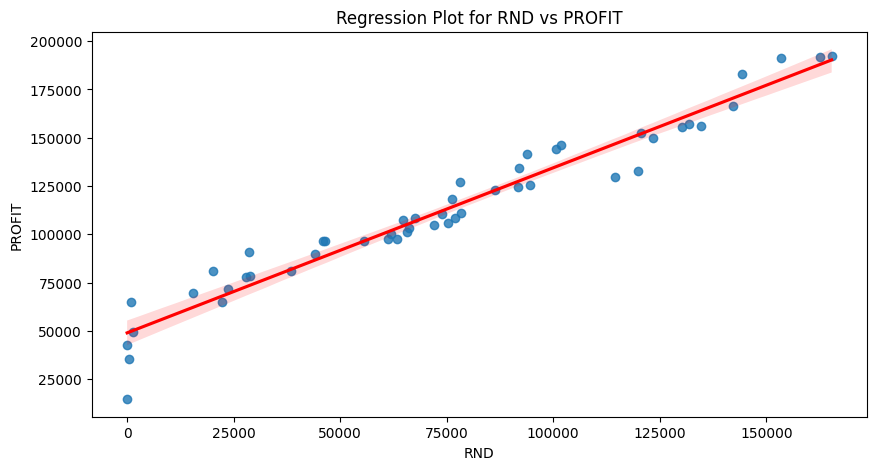

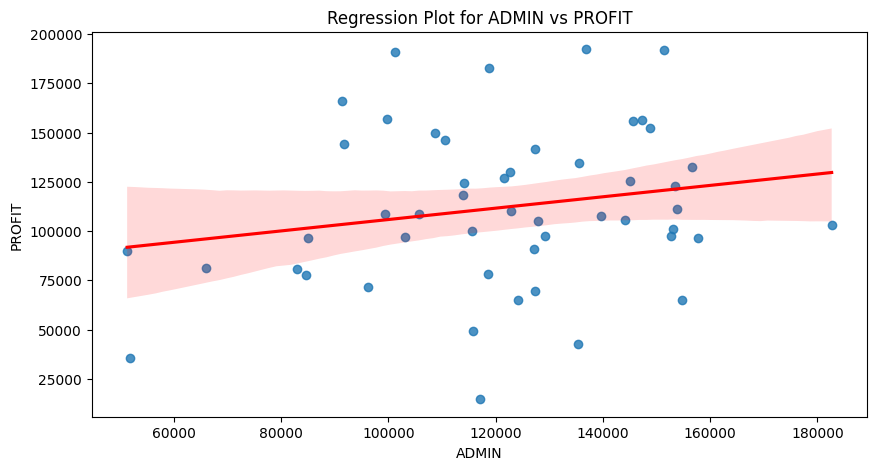

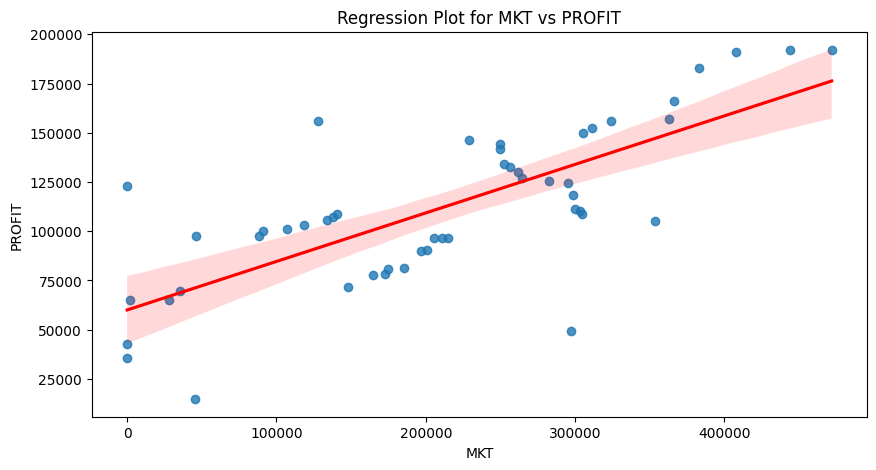

In [33]:

for i in ['RND', 'ADMIN', 'MKT']:
    plt.figure(figsize=(10,5))
    sns.regplot(data=df, x=i, y='PROFIT', line_kws={'color':'red'})
    plt.title(f'Regression Plot for {i} vs PROFIT')
    plt.show()